# Mid-plane pixel selection demo
Here we show an example of using the `select_midplane_pixels` function to select the pixels in a camera image which have mid-plane views based on their geometry.

First, set up an camera viewing the MAST-U vessel:

In [12]:
from numpy import sqrt, array
from tokamesh.utilities import Camera

image_shape = (512, 512)

camera = Camera(
    position=array([1.85, 0.0, 0.0]),
    direction=array([-1.0, 0.0, 0.0]),
    num_x=image_shape[0],
    num_y=image_shape[1],
    fov=100.0
)

ray_origins = camera.ray_starts
ray_directions = camera.ray_directions

Calculate the ray end-points for our demo by finding the positions where the rays intersect the MAST-U boundary:

In [13]:
from tokamesh.diagnostics import find_ray_boundary_intersections
from tokamesh.tokamaks import mastu_boundary

R_bnd, z_bnd = mastu_boundary()
ray_ends = find_ray_boundary_intersections(
    R_boundary=R_bnd,
    z_boundary=z_bnd,
    ray_origins=ray_origins,
    ray_directions=ray_directions,
)

Now we specify the allowed ranges of major-radius and z-height which define the condition for a pixel to have a mid-plane view:

In [14]:
# Set lower radius limit to filter out pixels which hit the centre-column
R_limits = (0.28, 1.3)
# Select for pixels which remain within 5cm of the mid-plane while inside the radius limits
z_limits = (-0.05, 0.05)

Now call `select_midplane_pixels` to find all pixels which meet the conditions:

In [15]:
from tokamesh.geometry import select_midplane_pixels
midplane = select_midplane_pixels(
    ray_origins=ray_origins,
    ray_ends=ray_ends,
    R_limits=R_limits,
    z_limits=z_limits
)

Now over-plot the identified mid-plane pixels with the depth image of the MAST-U vessel:

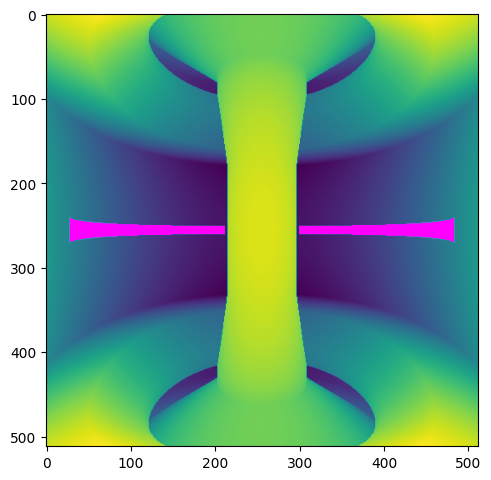

In [16]:
# convert the mid-plane pixel booleans into an image
midplane_image = midplane.reshape(image_shape).astype(float)

# calculate the depth-image
diffs = ray_ends - ray_origins
distances = sqrt((diffs**2).sum(axis=1))

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(5, 5))
ax1 = fig.add_subplot(1, 1, 1)
ax1.imshow(-distances.reshape(image_shape).T)
ax1.imshow(midplane_image.T, cmap="cool", alpha=midplane_image.astype(float).T)
plt.tight_layout()
plt.show()